In [1]:
import pandas as pd 
import pickle 
import numpy as np
from sklearn import preprocessing 
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score # For Checking Accuracy
from sklearn.model_selection import train_test_split # Splitting Data For Train Test
from sklearn import metrics
from sklearn.model_selection import cross_val_score # For Cross Validation
from sklearn.linear_model import Perceptron
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/Asad Aslam/Desktop/Dataset/train.csv")
df.shape
del df['id']
del df['f_27'] #deleting the irrelevent column

df.head(6)

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_21,f_22,f_23,f_24,f_25,f_26,f_28,f_29,f_30,target
0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,1,...,3.058541,-2.540739,0.766952,-2.730628,-0.208177,1.363402,67.609153,0,0,0
1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,4,...,2.179050,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,377.096415,0,0,1
2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,2,...,-0.784235,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,-195.599702,0,2,1
3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,1,...,-2.343819,0.572594,-1.653213,1.686035,-2.533098,-0.608601,210.826205,0,0,1
4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,0,...,1.133665,-3.912929,-1.430366,2.127649,-3.306784,4.371371,-217.211798,0,1,1
5,1.349785,1.100418,0.562612,-0.607076,1.264728,0.283515,-1.131953,6,2,4,...,0.463936,-2.259781,-1.308329,-2.216110,1.016892,0.273792,45.890998,0,1,0


[0.03148406 0.03154048 0.03150088 0.02845253 0.02863059 0.02970705
 0.02859556 0.03514374 0.0289192  0.03030426 0.0280664  0.02896708
 0.03166627 0.02593518 0.02990057 0.03070336 0.02729994 0.02951025
 0.02731785 0.04277721 0.03672566 0.04967693 0.04051857 0.04052111
 0.04880092 0.04341278 0.05124034 0.03552781 0.01201491 0.03513853]


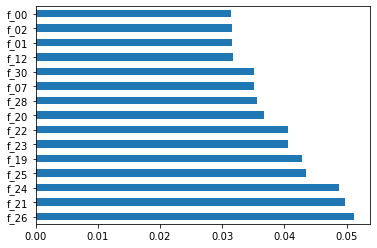

In [3]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
X = df.drop(columns=['target'])
y = df['target']
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [4]:
newdf = df[["f_19","f_20","f_21","f_22","f_23","f_24","f_25","f_26","f_28","target"]]
newdf.head(6)

,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_28,target
0,0.298218,-0.919717,3.058541,-2.540739,0.766952,-2.730628,-0.208177,1.363402,67.609153,0
1,-3.147667,-1.075434,2.179050,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,377.096415,1
2,2.820733,-3.485342,-0.784235,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,-195.599702,1
3,1.081084,-2.100177,-2.343819,0.572594,-1.653213,1.686035,-2.533098,-0.608601,210.826205,1
4,-0.126179,0.605033,1.133665,-3.912929,-1.430366,2.127649,-3.306784,4.371371,-217.211798,1
5,0.998751,3.358723,0.463936,-2.259781,-1.308329,-2.216110,1.016892,0.273792,45.890998,0


In [5]:
XTT = newdf.drop(columns=['target'])
yTT = newdf['target']
X_train, X_test, y_train, y_test = train_test_split(XTT, yTT, test_size=0.3, random_state=0)

In [6]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
print("Accuracy")
acc_perceptron

Accuracy


56.77

In [7]:
per_clf = Perceptron()
per_scores = cross_val_score(per_clf, X_train, y_train, cv=6)
per_mean = per_scores.mean()
print('Perception Accuracy: ',per_mean)

Perception Accuracy:  0.4939063492063492


In [8]:
dftest = pd.read_csv("C:/Users/Asad Aslam/Desktop/Dataset/test.csv")

del dftest['f_27']
dftest.head(6)

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_28,f_29,f_30
0,900000,0.442517,0.174380,-0.999816,0.762741,0.186778,-1.074775,0.501888,6,6,...,2.749347,-1.006400,-1.193879,-2.435736,-2.427430,-1.966887,5.734205,99.478419,0,0
1,900001,-0.605598,-0.305715,0.627667,-0.578898,-1.750931,1.355550,-0.190911,1,3,...,1.080762,2.382405,0.149442,1.883322,-2.848714,-0.725155,3.194219,-65.993825,1,0
2,900002,0.303990,2.445110,0.246515,0.818248,0.359731,-1.331845,1.358622,3,3,...,-1.406712,-7.026098,1.312277,-5.157192,1.714005,0.585032,0.066898,-87.405622,0,1
3,900003,0.154053,0.260126,-1.367092,-0.093175,-1.111034,-0.948481,1.119220,0,0,...,3.011085,-0.594532,-3.939475,1.754570,-2.364007,-1.003320,3.893099,-281.293460,0,0
4,900004,-1.651904,-0.424266,-0.667356,-0.322124,-0.089462,0.181705,1.784983,2,2,...,0.100594,0.084906,-0.985736,-0.130467,-3.557893,1.210687,1.861884,25.629415,0,2
5,900005,-1.403337,-0.867727,-2.557340,0.319702,1.784916,0.104167,-0.603412,2,3,...,1.344177,1.719947,2.182098,-2.820676,-1.311447,2.364910,2.511971,-278.119587,0,1


In [9]:
newtest = dftest[["f_19","f_20","f_21","f_22","f_23","f_24","f_25","f_26","f_28"]]
newtest.head(6)

,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_28
0,-1.128371,2.749347,-1.006400,-1.193879,-2.435736,-2.427430,-1.966887,5.734205,99.478419
1,-4.424098,1.080762,2.382405,0.149442,1.883322,-2.848714,-0.725155,3.194219,-65.993825
2,-1.523864,-1.406712,-7.026098,1.312277,-5.157192,1.714005,0.585032,0.066898,-87.405622
3,-1.404597,3.011085,-0.594532,-3.939475,1.754570,-2.364007,-1.003320,3.893099,-281.293460
4,-1.968516,0.100594,0.084906,-0.985736,-0.130467,-3.557893,1.210687,1.861884,25.629415
5,-1.684574,1.344177,1.719947,2.182098,-2.820676,-1.311447,2.364910,2.511971,-278.119587


In [10]:
RiyanNewCSV = dftest[['id']]
RiyanNewCSV

,id
0,900000
1,900001
2,900002
3,900003
4,900004
...,...
699995,1599995
699996,1599996
699997,1599997
699998,1599998


In [11]:
predictionOnTest = perceptron.predict(newtest)
print(predictionOnTest)
print(len(predictionOnTest))

[0 1 0 ... 1 0 0]
700000


In [12]:
RiyanNewCSV['target'] = predictionOnTest 
RiyanNewCSV

,id,target
0,900000,0
1,900001,1
2,900002,0
3,900003,0
4,900004,0
...,...,...
699995,1599995,1
699996,1599996,1
699997,1599997,1
699998,1599998,0


In [13]:
RiyanNewCSV.to_csv('RiyanNewCV1.csv', index=False)

In [14]:
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {
    'alpha': np.logspace(0,-9, num=1000)
}
perceptron = Perceptron()

grid = GridSearchCV(estimator=perceptron, param_grid=param_grid, cv=5)

In [ ]:
grid.fit(X_train, y_train)

In [ ]:
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

In [ ]:
import pandas as pd

grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
grid_results.head()